In [1]:
print('hello')

hello


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/Users/harshit/Downloads/Research-Commons-Quant/btc-dataset-metrics-test/dataset/btc.csv', parse_dates=["timestamp"])

In [14]:
# Rename and set index
df = df.rename(columns={"timestamp": "Date", "close": "Close"})
df = df.set_index("Date").sort_index()

In [18]:
# show only close part
df = df[["Close"]]
df

,Close
Date,
2022-07-27,22952.45
2022-07-28,23842.93
2022-07-29,23773.75
2022-07-30,23643.51
2022-07-31,23293.32
...,...
2024-02-18,52137.67
2024-02-19,51774.73
2024-02-20,52258.82


In [19]:
df["LogClose"] = np.log(df["Close"])
df["Return"] = df["Close"].pct_change()
df["LogReturn"] = df["LogClose"].diff()

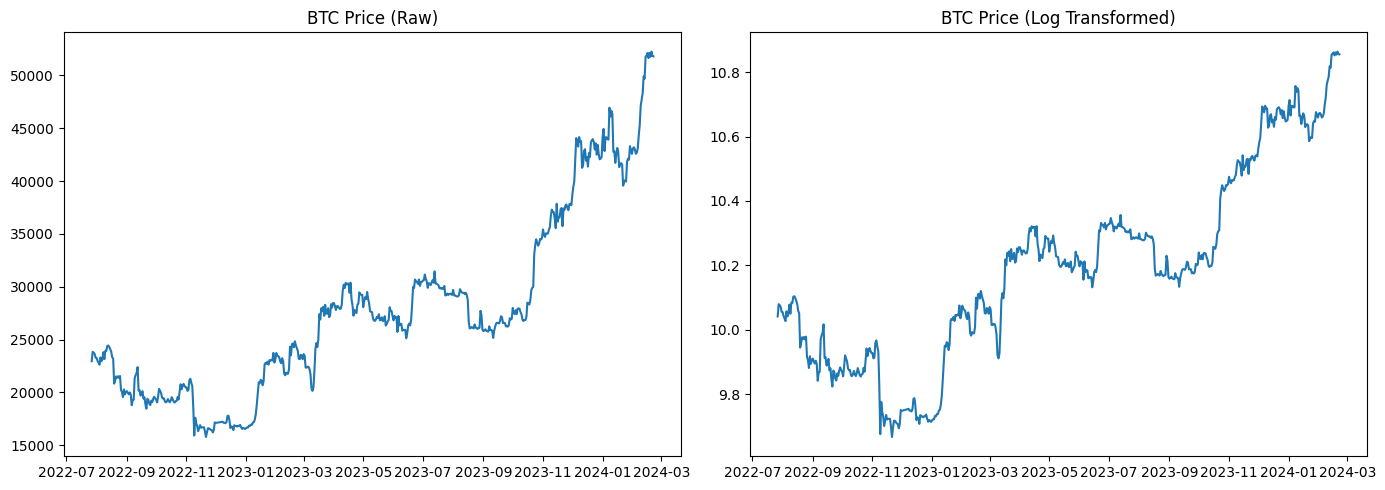

In [20]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(df["Close"])
plt.title("BTC Price (Raw)")

plt.subplot(1, 2, 2)
plt.plot(df["LogClose"])
plt.title("BTC Price (Log Transformed)")
plt.tight_layout()
plt.show()

In [21]:
df["RawReturn"] = df["Close"].pct_change()
df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))

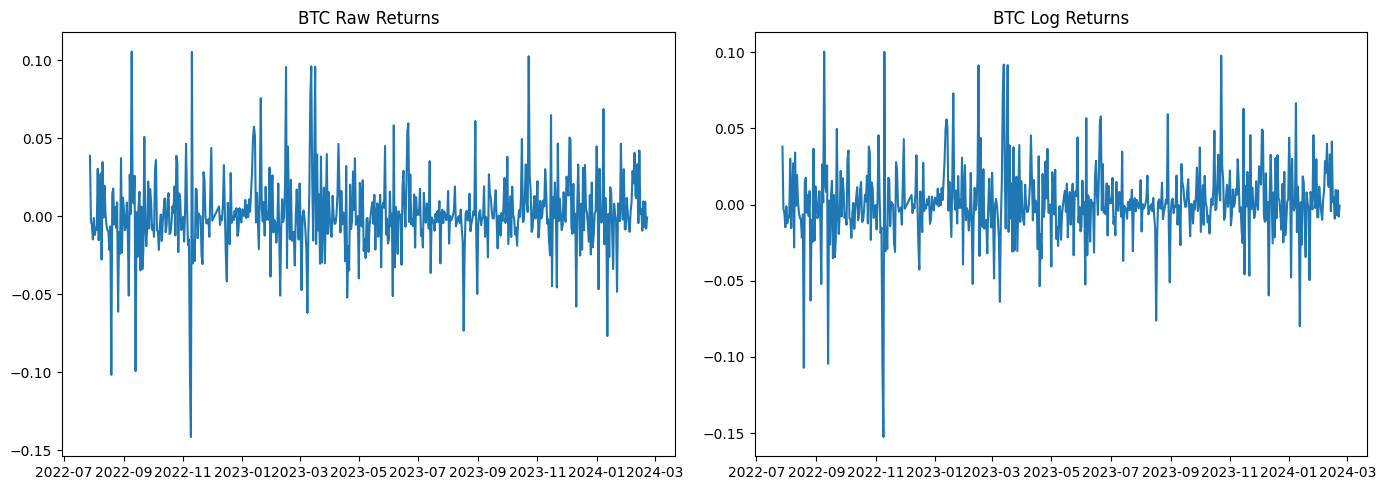

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(df["RawReturn"])
plt.title("BTC Raw Returns")

plt.subplot(1, 2, 2)
plt.plot(df["LogReturn"])
plt.title("BTC Log Returns")
plt.tight_layout()
plt.show()

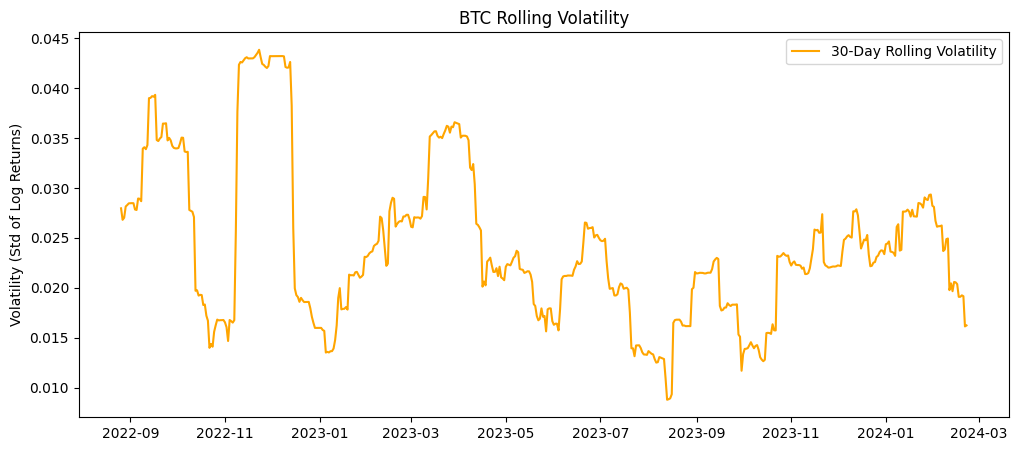

In [24]:
df["RollingVolatility"] = df["LogReturn"].rolling(window=30).std()

plt.figure(figsize=(12, 5))
plt.plot(df["RollingVolatility"], label="30-Day Rolling Volatility", color='orange')
plt.title("BTC Rolling Volatility")
plt.ylabel("Volatility (Std of Log Returns)")
plt.legend()
plt.show()


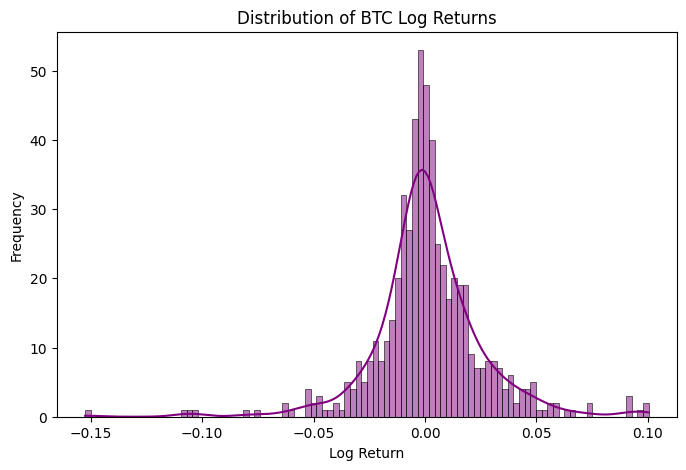

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df["LogReturn"].dropna(), bins=100, kde=True, color="purple")
plt.title("Distribution of BTC Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

In [28]:
print("Skewness:", df["LogReturn"].skew())
print("Kurtosis:", df["LogReturn"].kurt())

Skewness: -0.247017797912469
Kurtosis: 5.935988229231785


### Basically, finding sharpe & sortino ratio on RAW MARKET DATA if you would've had a long-only BTC portfolio from 2022-2024

In [34]:
# Sharpe Ratio (with 365 days scaling)
sharpe = df["LogReturn"].mean() / df["LogReturn"].std() * np.sqrt(365)

In [30]:
print(sharpe)

1.1006490175688375


In [35]:
# Sortino Ratio (with 365 days scaling)
downside_std = df[df["LogReturn"] < 0]["LogReturn"].std()
sortino = df["LogReturn"].mean() / downside_std * np.sqrt(365)

In [31]:
print(sortino)

1.4659748223808373


In [32]:
# Calculate Cumulative Returns
df["CumulativeReturn"] = (1 + df["LogReturn"]).cumprod()

# Calculate Running Maximum of Cumulative Returns
df["RunningMax"] = df["CumulativeReturn"].cummax()

# Calculate Drawdown
df["Drawdown"] = (df["CumulativeReturn"] - df["RunningMax"]) / df["RunningMax"]

# Max Drawdown is the minimum value in the Drawdown series
max_drawdown = df["Drawdown"].min()

print(f"Max Drawdown: {max_drawdown:.2%}")

Max Drawdown: -39.11%


In [33]:
print(f"Sharpe Ratio (Annualized): {sharpe:.2f}")
print(f"Sortino Ratio (Annualized): {sortino:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

Sharpe Ratio (Annualized): 1.10
Sortino Ratio (Annualized): 1.47
Max Drawdown: -39.11%


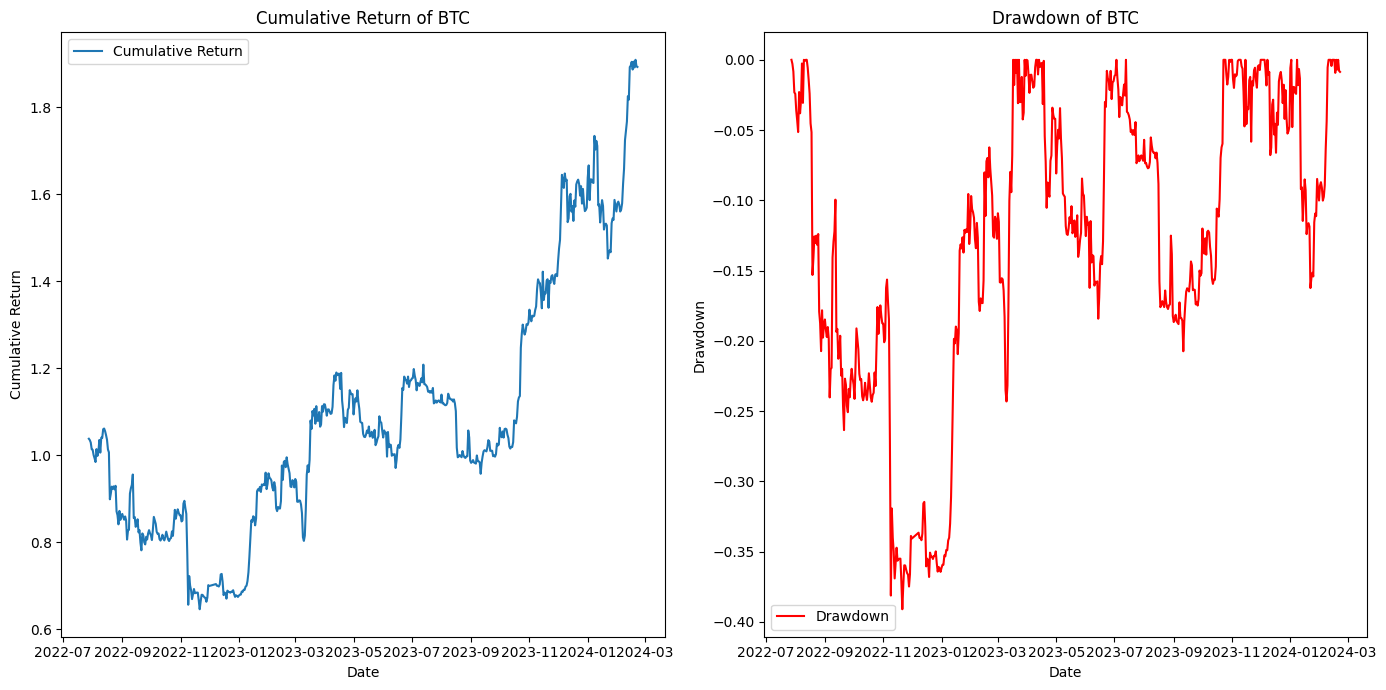

In [36]:
plt.figure(figsize=(14, 7))

# Plot Cumulative Returns
plt.subplot(1, 2, 1)
plt.plot(df["CumulativeReturn"], label="Cumulative Return")
plt.title("Cumulative Return of BTC")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()

# Plot Drawdown
plt.subplot(1, 2, 2)
plt.plot(df["Drawdown"], label="Drawdown", color="red")
plt.title("Drawdown of BTC")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
daily_volatility = df["LogReturn"].std()
print(f"Daily Volatility: {daily_volatility:.2%}")

Daily Volatility: 2.48%
